In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
# Read the data files and rename the columns to shorter names
col_names = ['facidity', 'vacidity', 'citric', 'sugar', 'chlorides', 'fsulfur', 'sulfur', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
red_wine_data = pd.read_csv('./data/winequality-red.csv', sep=';')
white_wine_data = pd.read_csv('./data/winequality-white.csv', sep=';')
red_wine_data.columns = col_names

In [171]:
# Adding a column marking whether wine is good or not
red_wine_data['good']=(red_wine_data['quality']>=7).apply(lambda x: 1 if x else -1)
col_names = np.append(col_names, 'good')
print('Number of good wines: {}'.format(red_wine_data['good'].value_counts()[1]))
print('Number of not good wines: {}'.format(red_wine_data['good'].value_counts()[-1]))

Number of good wines: 217
Number of not good wines: 1382


<AxesSubplot:>

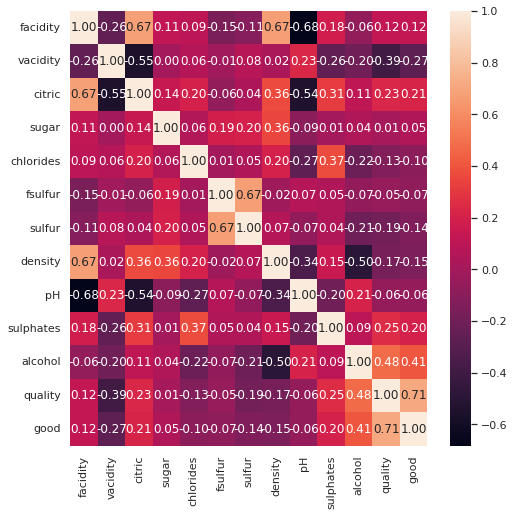

In [172]:
# Heatmap of feature correlations
corr = red_wine_data.corr()
sns.set(rc={"figure.figsize": (8, 8)})
sns.heatmap(corr, annot=True, fmt=".2f")

In [173]:
# Remove the quality column ffrom the data set
del red_wine_data['quality']

In [174]:
red_wine_data.head()

,facidity,vacidity,citric,sugar,chlorides,fsulfur,sulfur,density,pH,sulphates,alcohol,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,-1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,-1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,-1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,-1


In [175]:
red_wine_data.describe()

,facidity,vacidity,citric,sugar,chlorides,fsulfur,sulfur,density,pH,sulphates,alcohol,good
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,-0.728580
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.685175
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,-1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,-1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,-1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,-1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [176]:
from sklearn.model_selection import train_test_split
# Leave out some features and convert into numpy array
DROP_COLS = False
T = 0.5
cols_to_drop = ['facidity', 'density', 'vacidity']
red_wine_data_d = red_wine_data
#red_wine_data_d = red_wine_data_d[['vacidity', 'citric', 'sulphates', 'alcohol', 'good']]
if DROP_COLS: red_wine_data_d = red_wine_data.drop(columns=cols_to_drop)

X = red_wine_data_d.to_numpy()[:,:-1]
y = red_wine_data_d.to_numpy()[:,-1]

X_rest, X_t, y_rest, y_t = train_test_split(X, y, test_size=0.15)
print(len(y_t[y_t==1]))

25


Train f1 mean: 0.5312102501517888
Validation f1 mean: 0.5092108841516594
Accuracy train mean: 0.7915732047188702
Accuracy validation mean: 0.7792109832863034

Test f1 score: 0.5060240963855421
Accuracy Test score: 0.8291666666666667


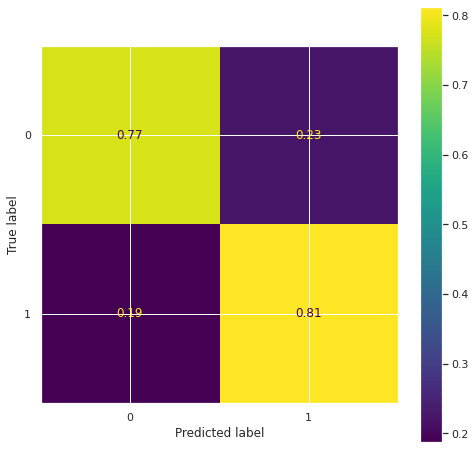

In [177]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

kf = KFold(shuffle=True)
f1_test = []
f1_train = []
acc_test = []
acc_train = []
i = 0
conf = np.zeros((2,2))
f1_best = 0

for train_index, test_index in kf.split(X_rest):
    i += 1
    X_train, y_train, X_test, y_test = X_rest[train_index], y_rest[train_index], X_rest[test_index], y_rest[test_index]
    logreg = make_pipeline(StandardScaler(), LogisticRegression(penalty='none', class_weight='balanced'))
    logreg.fit(X_train, y_train)
    y_pred_train = logreg.predict(X_train)
    y_pred_test = logreg.predict(X_test)
    f1_train.append(f1_score(y_train, y_pred_train))
    f1_test.append(f1_score(y_test, y_pred_test))
    acc_test.append(logreg.score(X_test, y_test))
    acc_train.append(logreg.score(X_train, y_train))
    if f1_test[-1] > f1_best:
        reg_best = logreg
        f1_best = f1_test[-1]
    conf += confusion_matrix(y_test, y_pred_test, normalize='true')

print('Train f1 mean: {}\nValidation f1 mean: {}\nAccuracy train mean: {}\nAccuracy validation mean: {}\n'.format(
    np.mean(f1_train), 
    np.mean(f1_test), 
    np.mean(acc_train),
    np.mean(acc_test)))    

ConfusionMatrixDisplay(conf/5).plot()

print('Test f1 score: {}\nAccuracy Test score: {}'.format(
    f1_score(y_t, reg_best.predict(X_t)),
    reg_best.score(X_t, y_t)))

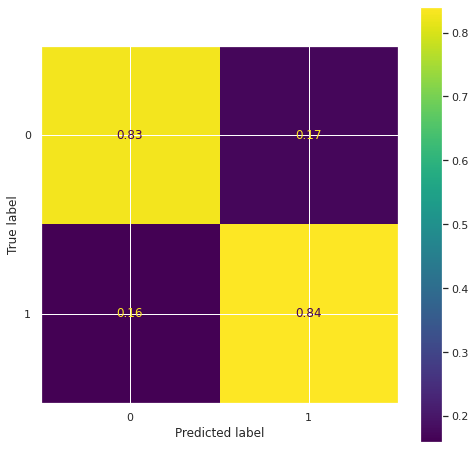

In [178]:
ConfusionMatrixDisplay(confusion_matrix(y_t, reg_best.predict(X_t), normalize='true')).plot()

In [179]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, test_size=0.2)
pca = PCA(n_components=2)
pca.fit(X_train)
pca.explained_variance_ratio_

array([0.9460803 , 0.04870915])

Max depth: 97



"print('Train accuracy score: {}\nValidation accuracy score: {}\nTrain f1 score: {}\nValidation f1 score: {}\n\nTest f1 score: {}'.format(\n    tree.score(X_train_pca, y_train),\n    tree.score(X_val_pca, y_val),\n    f1_score(y_train, y_train_pred),\n    f1_score(y_val, y_val_pred),\n    f1_score(y_t, tree.predict(X_t_pca))))"

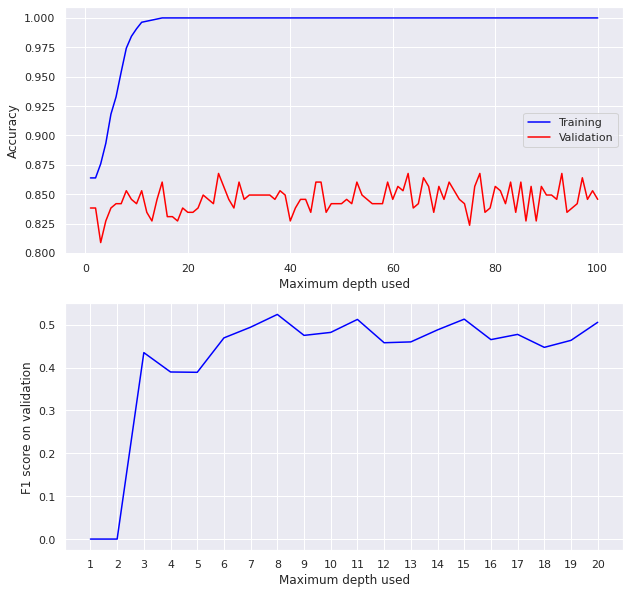

In [180]:
#X_train_pca = pca.transform(X_train)
#X_val_pca = pca.transform(X_val)
#X_t_pca = pca.transform(X_t)
X_train_pca = X_train
X_val_pca = X_val
X_t_pca = X_t

NUM = 100
f1_scores = np.zeros(NUM)
train_accs = np.zeros(NUM)
val_accs = np.zeros(NUM)

for depth in range(NUM):
    tree = DecisionTreeClassifier(max_depth=depth+1)
    tree.fit(X_train_pca, y_train)
    y_train_pred = tree.predict(X_train_pca)
    y_val_pred = tree.predict(X_val_pca)
    train_accs[depth] = tree.score(X_train_pca, y_train)
    val_accs[depth] = tree.score(X_val_pca, y_val)
    f1_scores[depth] = f1_score(y_val, y_val_pred)

fig, axs = plt.subplots(2,1)
axs[0].plot(np.linspace(1,NUM,num=NUM), train_accs, color='blue', label='Training')
axs[0].plot(np.linspace(1,NUM,num=NUM), val_accs, color='red', label='Validation')
axs[1].plot(np.linspace(1,20,num=20), f1_scores[:20], color='blue', )
axs[0].set_xlabel('Maximum depth used')
axs[1].set_xlabel('Maximum depth used')
axs[0].set_ylabel('Accuracy')
axs[1].set_ylabel('F1 score on validation')
axs[0].legend()
axs[1].set_xticks(np.linspace(1,20,num=20))

fig.set_size_inches(10,10)

print('Max depth: {}\n'.format(f1_scores.argmax()+1))

'''print('Train accuracy score: {}\nValidation accuracy score: {}\nTrain f1 score: {}\nValidation f1 score: {}\n\nTest f1 score: {}'.format(
    tree.score(X_train_pca, y_train),
    tree.score(X_val_pca, y_val),
    f1_score(y_train, y_train_pred),
    f1_score(y_val, y_val_pred),
    f1_score(y_t, tree.predict(X_t_pca))))'''

Depth used: 8
Train accuracy score: 0.9742410303587856
Validation accuracy score: 0.8455882352941176
Train f1 score: 0.903448275862069
Validation f1 score: 0.5333333333333332

Test f1 score: 0.6122448979591836


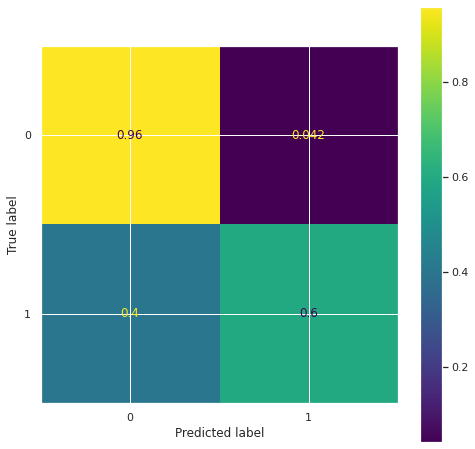

In [181]:
depth = np.argmax(f1_scores[:15])+1
tree = DecisionTreeClassifier(max_depth=depth, class_weight=None)
tree.fit(X_train_pca, y_train)
y_train_pred = tree.predict(X_train_pca)
y_val_pred = tree.predict(X_val_pca)
train_accs[depth] = tree.score(X_train_pca, y_train)
val_accs[depth] = tree.score(X_val_pca, y_val)
f1_scores[depth] = f1_score(y_val, y_val_pred)

print('Depth used: {}\nTrain accuracy score: {}\nValidation accuracy score: {}\nTrain f1 score: {}\nValidation f1 score: {}\n\nTest f1 score: {}'.format(
    depth,
    tree.score(X_train_pca, y_train),
    tree.score(X_val_pca, y_val),
    f1_score(y_train, y_train_pred),
    f1_score(y_val, y_val_pred),
    f1_score(y_t, tree.predict(X_t_pca))))

ConfusionMatrixDisplay(confusion_matrix(y_t, tree.predict(X_t_pca), normalize='true')).plot()